### https://www.kaggle.com/datasets/uciml/restaurant-data-with-consumer-ratings

In [160]:
import pandas as pd 
from IPython.display import display

ratings = pd.read_csv('restaurant-data/rating_final.csv')
parking = pd.read_csv('restaurant-data/chefmozparking.csv')
places = pd.read_csv('restaurant-data/geoplaces2.csv')

In [161]:
display(ratings.describe().T) # only numerical columns
display(parking.describe().T) # only numerical columns\
display(places.describe().T)

,count,mean,std,min,25%,50%,75%,max
placeID,1161.0,134192.041344,1100.916275,132560.0,132856.0,135030.0,135059.0,135109.0
rating,1161.0,1.199828,0.773282,0.0,1.0,1.0,2.0,2.0
food_rating,1161.0,1.215332,0.792294,0.0,1.0,1.0,2.0,2.0
service_rating,1161.0,1.090439,0.790844,0.0,0.0,1.0,2.0,2.0


,count,mean,std,min,25%,50%,75%,max
placeID,702.0,133180.945869,942.044238,132012.0,132649.25,132826.5,133008.75,135111.0


,count,mean,std,min,25%,50%,75%,max
placeID,130.0,134012.784615,1140.644582,132560.000000,132831.000000,134994.000000,135050.750000,135109.000000
latitude,130.0,21.858863,1.496830,18.859803,22.139574,22.149063,22.160125,23.760268
longitude,130.0,-100.342933,0.860585,-101.028600,-100.987838,-100.956777,-99.220458,-99.126506


In [36]:
ratings.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [37]:
parking.head()

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


In [162]:
places.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [163]:
ratings.placeID.nunique(), parking.placeID.nunique(), places.placeID.nunique()

(130, 675, 130)

In [34]:
num_cols = list(ratings._get_numeric_data())
cat_cols = ratings.drop(num_cols, axis=1)
num_cols, cat_cols

(['placeID', 'rating', 'food_rating', 'service_rating'],
      userID
 0     U1077
 1     U1077
 2     U1077
 3     U1077
 4     U1068
 ...     ...
 1156  U1043
 1157  U1011
 1158  U1068
 1159  U1068
 1160  U1068
 
 [1161 rows x 1 columns])

In [25]:
desc = pd.DataFrame(index=list(ratings))
desc['nunique'] = ratings.nunique()
desc['%unique'] = ratings.nunique()/len(ratings)*100
desc['null'] = ratings.isna().sum()
desc['%null'] = ratings.isna().sum()/len(ratings)*100
desc

,nunique,%unique,null,%null
userID,138,11.886305,0,0.0
placeID,130,11.197244,0,0.0
rating,3,0.258398,0,0.0
food_rating,3,0.258398,0,0.0
service_rating,3,0.258398,0,0.0


In [136]:
df = ratings.merge(parking, on='placeID', how='left')
df

,userID,placeID,rating,food_rating,service_rating,parking_lot
0,U1077,135085,2,2,2,public
1,U1077,135038,2,2,1,none
2,U1077,132825,2,2,2,none
3,U1077,135060,1,2,2,none
4,U1068,135104,1,1,2,yes
...,...,...,...,...,...,...
1156,U1043,132630,1,1,1,none
1157,U1011,132715,1,1,0,none
1158,U1068,132733,1,1,0,yes
1159,U1068,132594,1,1,1,public


In [147]:
ratings['placeID'].nunique(), parking['placeID'].nunique()

(130, 675)

In [148]:
df['parking_lot'].isna().sum()

0

In [149]:
df['parking_lot'].value_counts()

none             561
yes              389
public           182
valet parking     29
Name: parking_lot, dtype: int64

In [150]:
df.groupby('parking_lot')['service_rating'].mean()

parking_lot
none             1.098039
public           1.021978
valet parking    1.344828
yes              1.092545
Name: service_rating, dtype: float64

In [151]:
df.groupby('parking_lot')['service_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
parking_lot,,,,,,,,
none,561.0,1.098039,0.799115,0.0,0.0,1.0,2.0,2.0
public,182.0,1.021978,0.764951,0.0,0.0,1.0,2.0,2.0
valet parking,29.0,1.344828,0.813979,0.0,1.0,2.0,2.0,2.0
yes,389.0,1.092545,0.787578,0.0,0.0,1.0,2.0,2.0


In [153]:
len(set(ratings['placeID']) -  set(parking['placeID']))

0

In [156]:
df['userID'] = df['userID'].str[1:]
df.dropna(inplace=True)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 1160
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userID          1161 non-null   object
 1   placeID         1161 non-null   int64 
 2   rating          1161 non-null   int64 
 3   food_rating     1161 non-null   int64 
 4   service_rating  1161 non-null   int64 
 5   parking_lot     1161 non-null   object
dtypes: int64(4), object(2)
memory usage: 63.5+ KB


In [164]:
df = pd.merge(df, places, on='placeID')
df.head()

,userID,placeID,rating,food_rating,service_rating,parking_lot,latitude,longitude,the_geom_meter,name,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,1077,135085,2,2,2,public,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
1,1108,135085,1,2,1,public,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
2,1081,135085,1,2,1,public,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
3,1056,135085,2,2,2,public,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
4,1134,135085,2,1,2,public,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none


In [167]:
df.name.nunique()

129

<AxesSubplot:xlabel='rating', ylabel='count'>

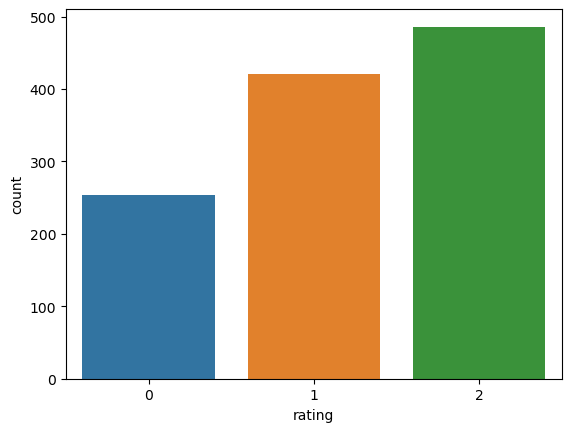

In [168]:
import seaborn as sns 

sns.countplot(x=df.rating)

In [169]:
df.rating.value_counts()

2    486
1    421
0    254
Name: rating, dtype: int64

In [173]:
item_ratings = df.groupby('placeID').agg({'rating': ['count', 'mean']}).reset_index()
item_ratings.columns = ['placeID', 'num_ratings', 'avg_rating']

In [174]:
item_ratings

,placeID,num_ratings,avg_rating
0,132560,4,0.500000
1,132561,4,0.750000
2,132564,4,1.250000
3,132572,15,1.000000
4,132583,4,1.000000
...,...,...,...
125,135088,6,1.000000
126,135104,7,0.857143
127,135106,10,1.200000
128,135108,11,1.181818


### Heatmap showing the correlation between the number of ratings and average rating for each place

In [176]:
# show the correlation between the number of ratings and average rating for each place
pivot = pd.pivot_table(item_ratings, index='num_ratings', columns='avg_rating', values='placeID') 
# (index, column)에 해당되는 값이 여러개면 by default 'mean' 값을 취함
pivot

avg_rating,0.250000,0.500000,0.600000,0.625000,0.666667,0.750000,0.777778,0.800000,0.857143,0.875000,...,1.555556,1.583333,1.600000,1.666667,1.692308,1.714286,1.750000,1.800000,1.833333,2.000000
num_ratings,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,132766.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,134975.0,NaN,NaN,NaN,NaN,NaN,NaN
4,133847.0,132560.0,NaN,NaN,NaN,133294.25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,135021.0,NaN,NaN,NaN
5,NaN,NaN,132739.5,NaN,NaN,NaN,NaN,132789.333333,NaN,NaN,...,NaN,NaN,134999.0,NaN,NaN,NaN,NaN,132755.0,NaN,133994.5
6,NaN,132663.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,132958.0,NaN,NaN,NaN,NaN,132922.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135104.0,NaN,...,NaN,NaN,NaN,NaN,NaN,135055.0,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,132732.0,NaN,132740.00,NaN,NaN,NaN,135048.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134986.0
9,NaN,NaN,NaN,NaN,NaN,NaN,135082.0,NaN,NaN,NaN,...,134996.0,NaN,NaN,135059.0,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135086.000000,NaN,NaN,...,NaN,NaN,132768.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='avg_rating', ylabel='num_ratings'>

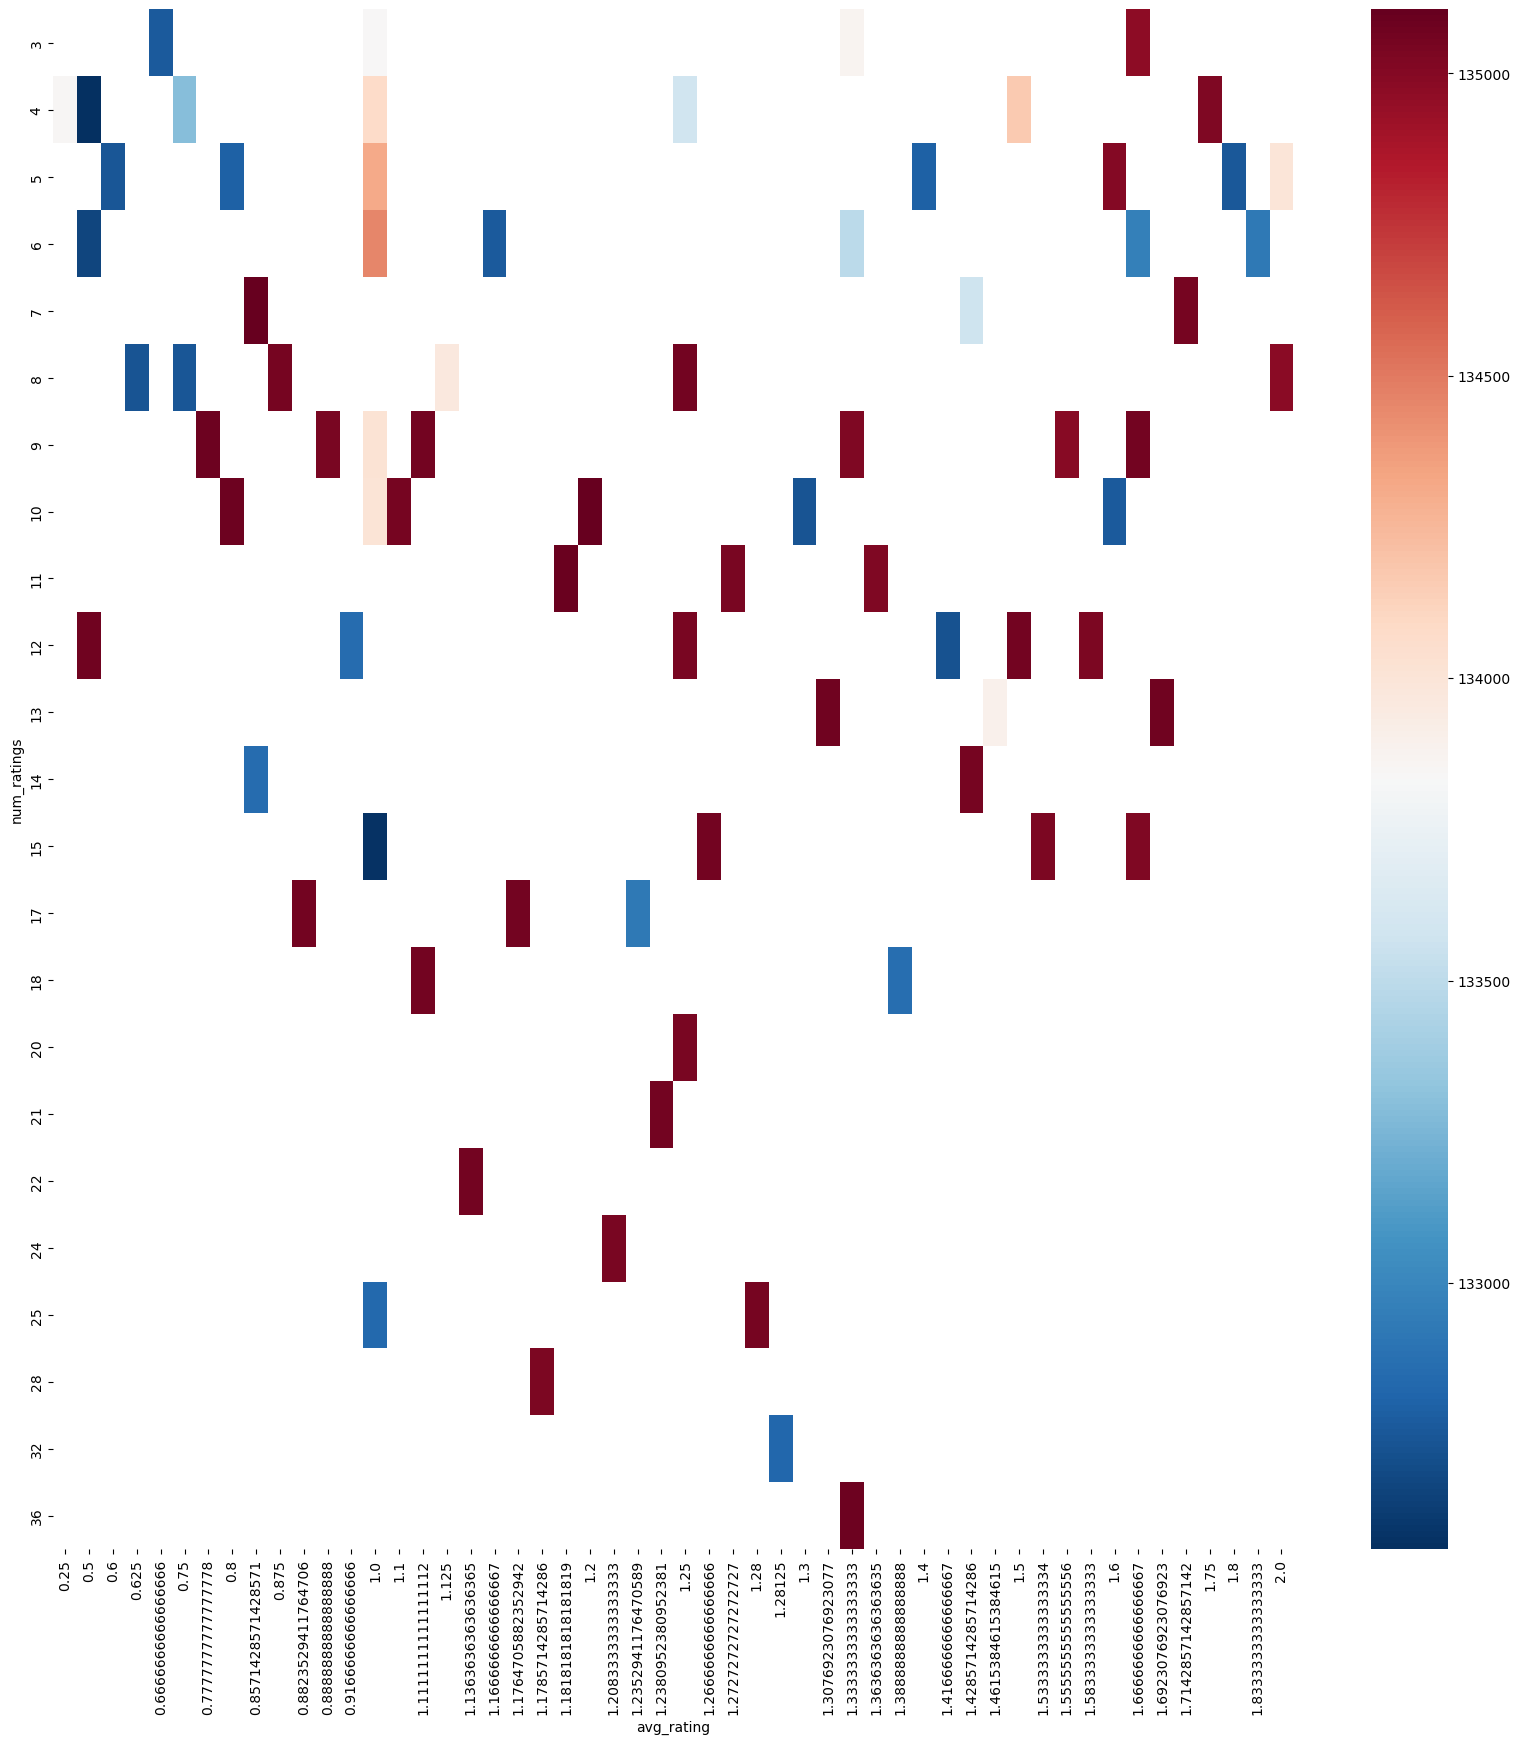

In [178]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.heatmap(pivot, cmap='RdBu_r')

The above graph does not make sense.

In [188]:
num_cols = [col for col in df._get_numeric_data()]
cat_cols = [col for col in df.columns if df[col].dtypes == 'object']
num_cols, cat_cols

(['placeID',
  'rating',
  'food_rating',
  'service_rating',
  'latitude',
  'longitude'],
 ['userID',
  'parking_lot',
  'the_geom_meter',
  'name',
  'address',
  'city',
  'state',
  'country',
  'fax',
  'zip',
  'alcohol',
  'smoking_area',
  'dress_code',
  'accessibility',
  'price',
  'url',
  'Rambience',
  'franchise',
  'area',
  'other_services'])

In [194]:
corrmat = df[['food_rating', 'rating']].corr()

In [195]:
corrmat.index, corrmat.columns

(Index(['food_rating', 'rating'], dtype='object'),
 Index(['food_rating', 'rating'], dtype='object'))

<AxesSubplot:>

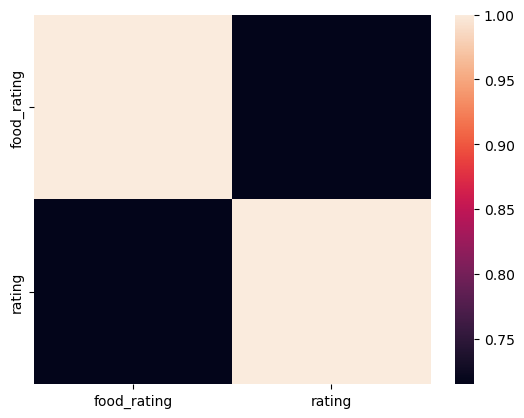

In [196]:
sns.heatmap(corrmat)

In [208]:
crosstab = pd.crosstab(df['name'], df['alcohol'])
crosstab

alcohol,Full_Bar,No_Alcohol_Served,Wine-Beer
name,,,
Abondance Restaurante Bar,0,0,12
Arrachela Grill,0,3,0
Cabana Huasteca,0,13,0
Cafe Chaires,0,15,0
Cafeteria cenidet,0,6,0
...,...,...,...
tacos de barbacoa enfrente del Tec,0,5,0
tacos de la estacion,0,4,0
tacos los volcanes,0,6,0


In [210]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [216]:
top_names = df['name'].value_counts().index[:10].to_list()

In [219]:
df_top = df[df['name'].isin(top_names)]

In [221]:
crosstab = pd.crosstab(df_top['name'], df_top['alcohol'])
crosstab

alcohol,Full_Bar,No_Alcohol_Served,Wine-Beer
name,,,
Cafeteria y Restaurant El Pacifico,0,0,28
Gorditas Doa Gloria,0,25,0
La Cantina Restaurante,25,0,0
Restaurant Oriental Express,0,20,0
Restaurant la Chalita,0,24,0
Restaurante El Cielo Potosino,0,21,0
Restaurante Marisco Sam,0,22,0
Restaurante Tiberius,0,18,0
Tortas Locas Hipocampo,0,36,0


In [224]:
from scipy.stats import chi2_contingency

contin = chi2_contingency(crosstab)
contin

(502.0000000000001,
 3.96244637461363e-95,
 18,
 array([[ 2.78884462, 22.0876494 ,  3.12350598],
        [ 2.49003984, 19.72111554,  2.78884462],
        [ 2.49003984, 19.72111554,  2.78884462],
        [ 1.99203187, 15.77689243,  2.2310757 ],
        [ 2.39043825, 18.93227092,  2.67729084],
        [ 2.09163347, 16.56573705,  2.34262948],
        [ 2.19123506, 17.35458167,  2.45418327],
        [ 1.79282869, 14.19920319,  2.00796813],
        [ 3.58565737, 28.39840637,  4.01593625],
        [ 3.187251  , 25.24302789,  3.56972112]]))